# Ultimate data science challenge

# Part 1 Exploratory data analysis

# Introduction
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

# 1.1 Load data

In [1]:
# Import needed modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from datetime import datetime, timedelta

In [2]:
df_log = pd.read_json('logins.json')

In [3]:
# Change time to datetime
df_log['login_time'] = pd.to_datetime(df_log['login_time'])

# Set time as index
df_log.set_index('login_time', inplace=True)

# Add a numeric column to record aggregate count
df_log['count'] = 1

In [4]:
# resample data for every 15 minutes
df_log = df_log.resample('15T').sum()

In [5]:
df_log.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


# 1.2 Check the overall trend

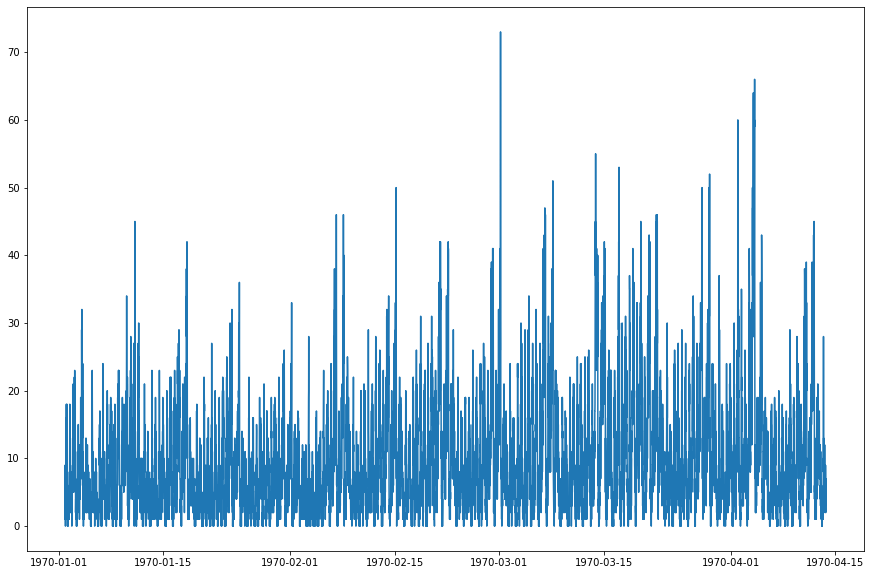

In [6]:
# Plot the counts to see the trend
plt.figure(figsize=(15,10))
plt.plot(df_log)
plt.show()

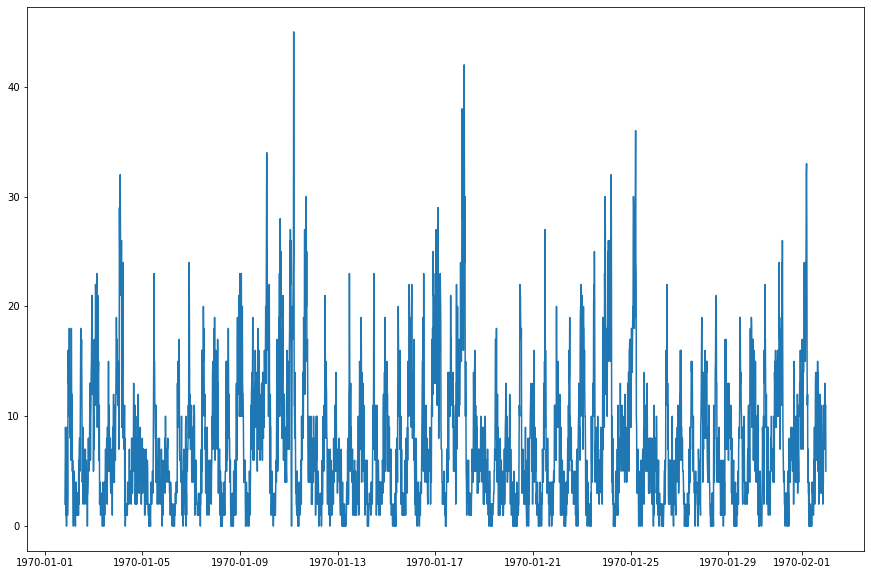

In [7]:
# Plot the counts in one month to see the trend
plt.figure(figsize=(15,10))
plt.plot(df_log['1970-01-01':'1970-02-01'])
plt.show()

### Observations: Totally there are 4 months of login data. 
1. It looks there is a general slight increase trend from January to March
2. There is period within a month, week
We are going to check these in more details

# 1.3 Check the login activities in different months

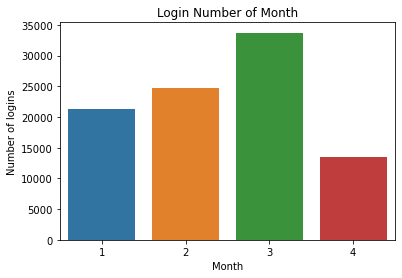

In [8]:
# Calculate login activities in different months
log_m = df_log.resample('1m').sum()
# Plot the login numbers in each month
plt.figure(figsize=(6,4))
sns.barplot(x=np.arange(1,(len(log_m)+1)), y=log_m['count'])
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.show()


### Observation: The login number increased from January to March and dropped at April. 
It looks there may be some seasonal peroid. But more data expanding longer time period are needed to demonstrate this.

# 1.4 Check the login activities in different weeks

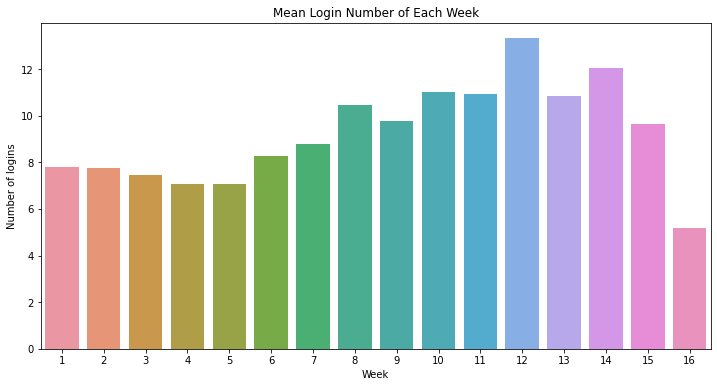

In [9]:
# Check login activities in different weeks
log_w = df_log.resample('1w').mean()

# Plot these login numbers in each week
plt.figure(figsize=(12,6))
sns.barplot(x=np.arange(1,(len(log_w)+1)), y=log_w['count'])
plt.title("Mean Login Number of Each Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.show()

### Observation: There are no obviouse trend within weeks.

# 1.5 Check the login activities in different days

In [10]:
# Check login activities in different days of a week
log_d = df_log.resample('1d').mean()

# Reset index
log_d = log_d.reset_index()

# Create a new column called 'weekday'
log_d['weekday'] = log_d['login_time'].dt.dayofweek

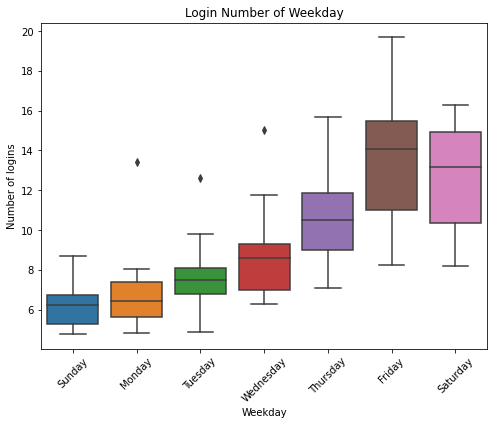

In [11]:
# Plot the distribution of average login number of each weekday.
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='weekday', y='count', data=log_d)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels(['Sunday', 'Monday','Tuesday','Wednesday', 'Thursday', 'Friday','Saturday'])
plt.show()

### Observation: The average login number increased all the way from Sunday to Friday and Saturday, but the variation increase too.

# 1.6 Check the login activities in daily cycle

In [12]:
# Check login activities in different days of a week
log_h = df_log.resample('1h').mean()

# Reset index
log_h = log_h.reset_index()

# Create a new column called 'hour'
log_h['hour'] = log_h['login_time'].dt.hour

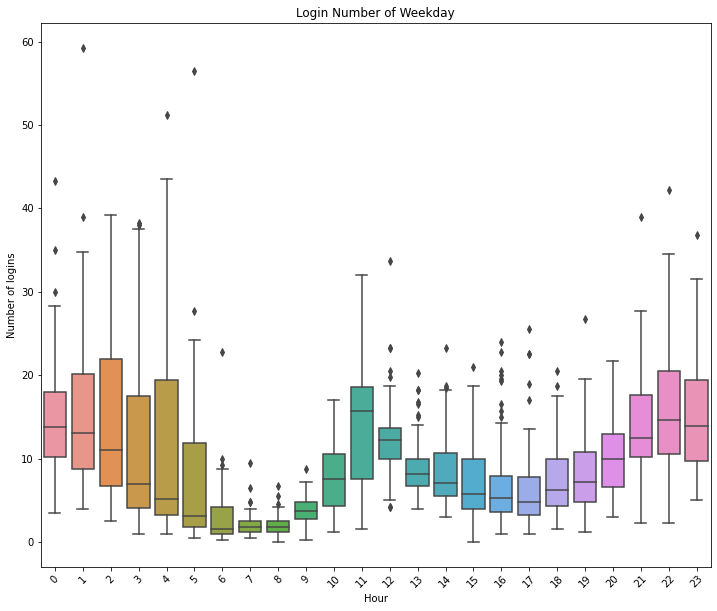

In [13]:
# Plot the distribution of average login number of each hour.
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='hour', y='count', data=log_h)
plt.title("Login Number of Weekday")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels(np.arange(len(log_h)))
plt.show()

### Observation: The is obvious cycle in a day, the login number dropped from 6-10 in the morning and afternoon 14-18.

# Summary:
1. The login number increased from January to March and dropped at April.It looks there may be some seasonal peroid. But more data expanding longer time period are needed to demonstrate this.
2.  The average login number increased all the way from Sunday to Friday and Saturday, but the variation increase too.
3. The is obvious cycle in a day, the login number dropped from 6-10 in the morning and afternoon 14-18.

# Part 2 - Experiment and metrics design

## Question
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

# Answer
I will choose thest two metrics to compare records before and after the experiment implemented.
1. weekday_pct: the percent of the user's trips occurrring during a weekday in both Gotham and Metropolis
2. weekend_pct: the percent of the user's trips occuring during a weekend in both Gotham and Metropolis

Step 1, Split the data into two groups: before and after the implementation of reimbursing all toll costs.
Step 2, Do some descriptive data analysis of these two group 
Step 3, Do statistic significance test to determine the observation is real or just by chance


# Part 3 Predictive modeling for rider retention

# Introduction
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).
Data description:

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday


In [14]:
df = pd.read_json('Ultimate_data_challenge.json')

In [15]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


# 3.1 EDA

In [16]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [17]:
# Add target column called "active_user" which is defined as users use the service in the last 30 days from 2014-06-30
cutoff = pd.to_datetime('2014-05-31')
df['active_user'] =  pd.to_datetime(df['last_trip_date']) > cutoff
df['active_user'] = df['active_user'].astype(int)

In [18]:
# Hot-Encode for city
df = pd.get_dummies(df, columns=['city'], prefix='city')

In [19]:
# Change column "ultimate_black_user " into int type
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

In [20]:
# Drop uncenessary columns
drop_cols = ['signup_date', 'last_trip_date', 'phone']
df = df.drop(columns = drop_cols)

In [21]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_Astapor,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
ultimate_black_user,50000.0,0.377080,0.484660,0.0,0.00,0.00,1.00,1.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00
active_user,50000.0,0.376080,0.484405,0.0,0.00,0.00,1.00,1.00
city_Astapor,50000.0,0.330680,0.470463,0.0,0.00,0.00,1.00,1.00


In [23]:
# check null value
df.isnull().sum()

trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active_user                  0
city_Astapor                 0
city_King's Landing          0
city_Winterfell              0
dtype: int64

In [24]:
# fill the missing "avg_rating_of_driver" and "avg_rating_by_driver" with mean value
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())

In [25]:
df.isnull().sum()

trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active_user               0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
dtype: int64

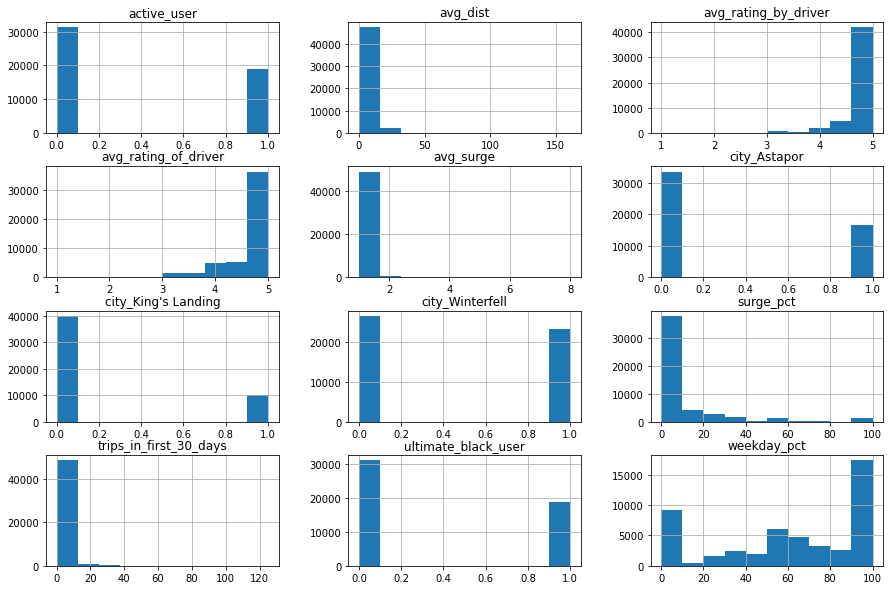

In [26]:
# Plot the features
df.hist(bins=10, figsize=(15,10))
plt.show()

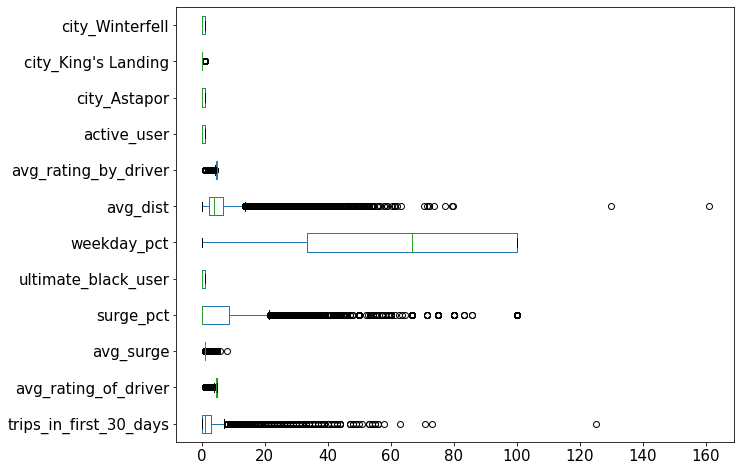

In [27]:
# Anamolies and Outliers review
boxplot = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(10,8))

### The data looks fine. Going to build random forest model to predict

# 3.2 Modeling

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [29]:
x = df.drop('active_user', axis=1)
y = df['active_user']

In [30]:
# Standardize the data 
scaler = StandardScaler()
x_scl = scaler.fit_transform(x)

# Split and training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [31]:
# Initiate random forest modeling
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_test_pred_rf = rf.predict(x_test)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      9272
           1       0.67      0.65      0.66      5728

    accuracy                           0.74     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.74      0.74      0.74     15000

The accuracy score is 0.7445333333333334
The confusion matrix is 
[[7438 1834]
 [1998 3730]]


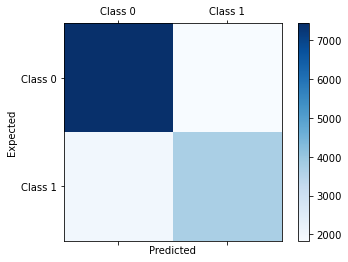

In [32]:
# Model evaluation
print(classification_report(y_test, y_test_pred_rf))

# Calcuate accuracy and confusion_matrix
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
conf_mat_rf = confusion_matrix(y_test,y_test_pred_rf) 

def plot_conf_mat(arr):
    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(arr, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

print("The accuracy score is {}".format(accuracy_rf))

print("The confusion matrix is \n{}".format(conf_mat_rf))

plot_conf_mat(conf_mat_rf)

In [33]:
# Model tuning
param_grid = {'n_estimators':[10, 50, 100],
               'criterion':['gini','entropy'],
               'max_depth':[20, 40, 60]}
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf,param_grid, cv=5)
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, 60],
                         'n_estimators': [10, 50, 100]})

In [34]:
# Print the best score and best parameters
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7550285714285715
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}


In [35]:
# The best model is with 'criterion': entropy, 'max_depth': 20, 'n_estimators': 100
rf_final = RandomForestClassifier(criterion='entropy', n_estimators=20, max_depth = 100, random_state = 1234)
rf_final_result = rf_final.fit(x_train, y_train)
y_test_pred_rf_final = rf_final_result.predict(x_test)

The accuracy score is 0.7422
The confusion matrix is 
[[7502 1770]
 [2097 3631]]


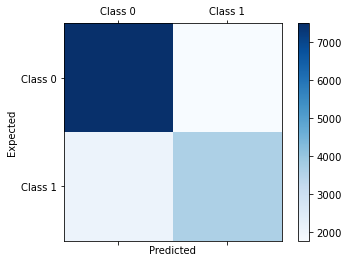

In [36]:
accuracy_rf_final = accuracy_score(y_test, y_test_pred_rf_final)
conf_mat_rf_final = confusion_matrix(y_test,y_test_pred_rf_final) 

print("The accuracy score is {}".format(accuracy_rf_final))

print("The confusion matrix is \n{}".format(conf_mat_rf_final))

plot_conf_mat(conf_mat_rf_final)

In [37]:
# create a dataframe of feature importance from gb_final model
features = pd.DataFrame({'rf_final':rf_final.feature_importances_}, index=x.columns)

# Sort by highest values
features.sort_values('rf_final', ascending=False)[:20]


,rf_final
avg_dist,0.352332
weekday_pct,0.133464
avg_rating_by_driver,0.109053
avg_rating_of_driver,0.088684
trips_in_first_30_days,0.086443
surge_pct,0.081079
avg_surge,0.055424
city_King's Landing,0.037183
ultimate_black_user,0.028561
city_Astapor,0.015151


## Conclusion
It looks like the avergae distance in miles per trip taken in the first 30 days after signup is a very good indicator for becoming a long-term rider.
This recommend the management can give more promotions in the first 30 days to encourage the riders to ride more time and distance. This may improve the ratio to be an active rider.